# TensorFlow ile Konvolüsyonel Sinir Ağları

"Derin Öğrenme", genellikle insan beyninin öğrenme ve karar verme şeklini sentezleyen çok katmanlı sinir ağlarının kullanımına atıfta bulunan genel bir terimdir. Evrişimli bir sinir ağı, ağırlıkları uygulamak ve kenarlar, köşeler vb. görüntü. Bu modellerin sayısal temsilleri daha sonra, özellikleri belirli sınıflara eşlemek için tamamen bağlı bir sinir ağı katmanına geçirilir.

CNN'ler oluşturmak için yaygın olarak kullanılan birkaç çerçeve vardır. Bu defterde, TensorFlow kullanarak basit bir CNN örneği oluşturacağız.

## Kitaplıkları kurma ve içe aktarma

Öncelikle ihtiyacımız olacak TensorFlow kitaplıklarını yükleyip içe aktaralım.

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
print("TensorFlow version: ", tensorflow.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.12.0
Keras version:  2.12.0


## Verileri keşfetme

Bu alıştırmada, geometrik şekillerin görüntülerini sınıflandırabilen CNN tabanlı bir sınıflandırma modeli eğiteceksiniz. Modelin tanımlaması gereken şekil sınıflarına bir göz atalım.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [5]:
data_folder = r"C:\Users\PC\Documents\Machine Learning Challenge\Notebook\shapes"

In [8]:
# Sınıf isimlerini alın
classes = os.listdir(data_folder)
classes.sort()

In [9]:
print(len(classes), "classes: ")
print(classes)

3 classes: 
['circle', 'square', 'triangle']


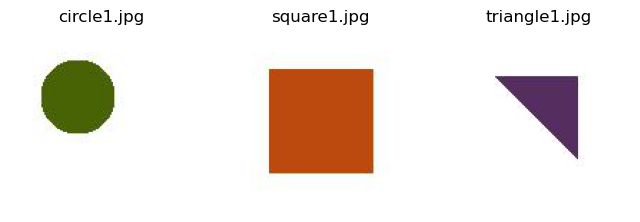

In [10]:
# Her klasördeki ilk resmi gösterin
fig = plt.figure(figsize=(8,12))
i = 0
# i adında bir sayaç değişkeni oluşturulur. 
# Bu sayaç, alt klasörlerdeki resimlerin sıralı olarak ekrana yerleştirilmesine yardımcı olacak.
for sub_dir in os.listdir(data_folder):
    # data_folder dizinindeki alt klasörleri sub_dir adıyla teker teker dolaşmak için bir döngü oluşturulur.
    i += 1
    # Her alt klasör için sayaç bir artırılır. Bu, her alt klasördeki resmi farklı bir konuma yerleştirmek için kullanılacak.
    img_file = os.listdir(os.path.join(data_folder, sub_dir))[0]
    #  Alt klasördeki resim dosyalarından ilkini seçmek için os.listdir() fonksiyonu kullanılır.
    img_path = os.path.join(data_folder, sub_dir, img_file)
    # Seçilen resmin tam yolunu oluşturmak için os.path.join() fonksiyonu kullanılır.
    img = mpimg.imread(img_path)
    # Seçilen resim, mpimg.imread() fonksiyonu ile okunur ve img değişkenine atanır.
    a = fig.add_subplot(1, len(classes), i)
    # Resimlerin görüntüleneceği alt pencere (subplot) oluşturulur. Bu, birden fazla resmi yan yana eklemek için kullanılır.
    # 1, len(classes) ifadesi, satır ve sütun sayısını belirtirken, i de resmin konumunu belirler.
    a.axis("off")
    # Alt pencere üzerindeki eksenleri (eksen işaretleyicileri ve etiketleri) kapatır, böylece resimler çıplak olarak görüntülenir.
    imgplot = plt.imshow(img)
    # Resmi alt pencerede görüntülemek için imshow() fonksiyonu kullanılır.
    a.set_title(img_file)
    # Alt pencereye resmin adını (dosya adını) eklemek için set_title() fonksiyonu kullanılır.
plt.show()    

## Verileri hazırlama

Modeli eğitmeden önce verileri hazırlamamız gerekiyor. Özellik değerlerini 255'e bölerek 0 ile 1 arasında kayan nokta değerleri olarak normalleştireceğiz ve verileri bölerek %70'ini modeli eğitmek için kullanacağız ve %30'unu doğrulamak için geri tutacağız . Verileri yüklerken, veri oluşturucu, verilerin depolandığı alt klasörlere göre her görüntünün hangi sınıfa ait olduğunu belirtmek için "sıcak kodlanmış" sayısal etiketler atayacaktır. Bu durumda, üç alt klasör vardır - *daire*, *kare* ve *üçgen*, dolayısıyla etiketler, bu sınıflardan hangisinin resimle ilişkilendirildiğini gösteren üç *0* veya *1* değerinden oluşacaktır - örneğin [0 1 0] etiketi görüntünün ikinci sınıfa (*kare*) ait olduğunu belirtir.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
img_size = (128, 128) # Resimlerin hedef boyutunu belirten bir demet (tuple) tanımlanır.
batch_size = 30 #  Eğitim ve validasyon sırasında her adımda işlenecek resim sayısını belirleyen bir değişken tanımlanır. 
# Batch size, bellek kullanımını optimize etmeye yardımcı olur.

print("Veri Alınıyor...")
datagen = ImageDataGenerator(rescale=1./255, # piksel değerlerini normalleştirin
                             validation_split=0.3) # doğrulama için görüntülerin %30'unu geri alın
# ImageDataGenerator sınıfı, resimleri verimli bir şekilde yüklemek, ön işlemek ve artırma(augmentation) yapmak için kullanılır.
# rescale özelliği, piksel değerlerini [0, 1] aralığına normalize etmek için kullanılır. 
# validation_split özelliği, veri kümesinin ne kadarının doğrulama için ayrılacağını belirler (bu durumda %30).

Veri Alınıyor...


In [13]:
print("Eğitim veri seti hazırlanıyor...")
train_generator = datagen.flow_from_directory(data_folder,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              subset="training")
# ImageDataGenerator nesnesinin flow_from_directory yöntemi, veri kümesini belirtilen dizin yapısından yüklemek için kullanılır.
# data_folder: Eğitim veri kümesinin bulunduğu ana klasörün yolunu belirtir. 
# target_size=img_size: Resimlerin hedef boyutunu belirtir. 
# batch_size=batch_size: Eğitim verilerinin her adımda modele kaç resimle besleneceğini belirtir.
# class_mode='categorical': Veri kümesinin sınıf modunu belirtir. 'categorical' olarak ayarlandığı için, 
# sınıflar one-hot encoding ile temsil edilir.
# subset='training': Veri kümesinin alt kümelerinden hangisinin oluşturulacağını belirtir. 
# Bu durumda, eğitim verileri için kullanılacak alt küme oluşturulur.

Eğitim veri seti hazırlanıyor...
Found 840 images belonging to 3 classes.


In [14]:
print("Doğrulama veri kümesi hazırlanıyor...")
validation_generator = datagen.flow_from_directory(data_folder,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   subset="validation")

Doğrulama veri kümesi hazırlanıyor...
Found 360 images belonging to 3 classes.


In [15]:
classnames = list(train_generator.class_indices.keys())
# Eğitim veri üretecindeki sınıf etiketlerini classnames adlı bir liste olarak alır. 
# Bu, modelin tahminleriyle gerçek sınıf etiketlerini eşleştirmek için kullanılabilir. 
print("Veri oluşturucular hazır")

Veri oluşturucular hazır


## CNN'yi tanımlama

Artık modelimizi oluşturmaya hazırız. Bu, CNN'imiz için katmanları tanımlamayı ve çok sınıflı sınıflandırma için bunları derlemeyi içerir.

In [18]:
# Bir CNN sınıflandırıcı ağı tanımlayın
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [19]:
# Modeli bir katman dizisi olarak tanımlayın
model = Sequential()

# Giriş katmanı bir görüntüyü kabul eder ve 32 6x6 filtre ve düzeltilmiş doğrusal birim aktivasyon işlevi 
# kullanan bir evrişim uygular
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation="relu"))
# Modelin ilk katmanı olarak bir 2D evrişimli katman (Convolutional Layer) eklenir. 
# Bu katmanda 32 adet 6x6 boyutunda filtre kullanılır ve ReLU (Rectified Linear Unit) aktivasyon fonksiyonu uygulanır. 
# input_shape argümanı, modelin giriş boyutunu belirler ve train_generator.image_shape olarak tanımlanan hedef boyuta uygun olmalıdır.

# Ardından, 2x2 yama ile bir maksimum havuzlama katmanı ekleyeceğiz
model.add(MaxPooling2D(pool_size=(2, 2)))
# Bu katman, 2x2 boyutunda bir maksimum öğenin alınmasıyla resim boyutunu yarıya indirir.

# Gerekli olduğunu düşündüğümüz kadar katman ekleyebiliriz - burada başka bir evrişim ve maksimum havuzlama katmanı ekleyeceğiz.
model.add(Conv2D(32, (6, 6), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ve bir takım daha
model.add(Conv2D(32, (6, 6), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bir bırakma katmanı, karşılıklı bağımlılıkları azaltmak için bazı düğümleri rasgele bırakır (bu, aşırı sığdırmaya neden olabilir)
model.add(Dropout(0.2))
# Dropout, aşırı uyumu önlemek için bazı düğümlerin rastgele olarak bırakılmasıyla eğitim sırasında ağın üzerindeki 
# etkileşimleri azaltır. Burada, %20 olasılıkla düğümler rastgele bırakılır.

# Özellik haritalarını düzleştirin
model.add(Flatten())
# Flatten katmanı, evrişimli katmanların 2D çıktılarını tek bir uzun vektöre dönüştürür. 
# Bu, tam bağlantılı (fully connected) katmanlara geçiş yapabilmek için gereklidir.

# Her sınıf için tahmini bir olasılıkla tam bağlantılı bir çıktı katmanı oluşturun
# (softmax, tüm olasılıkların toplamının 1 olmasını sağlar)
model.add(Dense(train_generator.num_classes, activation="softmax"))
# Modelin bu katmanından, her sınıf için tahmin edilen olasılıkları içeren bir vektör üretilir. 
# train_generator.num_classes, eğitim veri üretecindeki sınıf sayısını temsil eder ve bu, çıktı katmanının boyutunu belirler. 
# softmax aktivasyon fonksiyonu, çıktıların olasılık değerlerine dönüştürülmesini sağlar.

# Tanımlanan katmanlar ile artık modeli kategorik (çok sınıflı) sınıflandırma için derleyebiliriz
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
# Model, eğitim için hazır hale getirilir. 
# Kayıp fonksiyonu (loss) olarak kategorik çapraz entropi (categorical crossentropy) kullanılır, 
# çünkü bu bir çok sınıflı (categorical) sınıflandırma problemidir. 
# Optimizasyon algoritması olarak 'adam' kullanılır ve doğruluk (accuracy) metriği kullanılır.

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)      

## Modeli eğitme

Tanımlanan CNN katmanları ile, görüntü verilerimizi kullanarak modeli eğitmeye hazırız. Aşağıdaki örnekte, doğrulama için verilerin %30'unu tutarak, modeli 30 resimlik gruplar halinde eğitmek için 5 yineleme (*dönem*) kullanıyoruz. Her dönemden sonra, kayıp işlevi modeldeki hatayı (*kayıp*) ölçer ve doğruluğu artırmaya çalışmak için (ilk yineleme için rastgele oluşturulmuş) ağırlıkları ayarlar.

> **Not**: Bu basit örnekte eğitim süresini en aza indirmek için yalnızca 5 dönem kullanıyoruz. Gerçek dünyadaki bir CNN genellikle bundan daha fazla çağda eğitilir. CNN modeli eğitimi, çok sayıda matris ve vektör tabanlı işlemi içeren işlemci yoğun bir eğitimdir; bu nedenle, bu tür hesaplamalar için optimize edilmiş GPU'lardan yararlanabilen bir sistemde bunu gerçekleştirmeniz önerilir. CPU tabanlı bir sistemde bunun tamamlanması biraz zaman alacaktır - eğitim ilerledikçe durum görüntülenecektir.

In [20]:
# Modeli 30 resimlik gruplar ve doğrulama için doğrulama uzatma veri setini kullanarak 5 dönem boyunca eğitin
num_epochs = 5
# num_epochs, eğitim sırasında modelin kaç tur (epoch) boyunca eğitileceğini belirten değişkendir.
history = model.fit(train_generator, 
                    # Eğitim veri üretecisini belirtir. Model, eğitim verilerini bu veri üreteci üzerinden alır.
                    steps_per_epoch=train_generator.samples // batch_size,
                    # Eğitim verilerinin her bir epoch için kaç adımda bir güncelleneceğini belirler. 
                    # Bu değer, eğitim veri üretecindeki toplam veri sayısının batch_size ile bölümünün tam kısmıdır.
                    validation_data=validation_generator,
                    # Doğrulama veri üretecisini belirtir. Model, doğrulama verilerini bu veri üreteci üzerinden alır.
                    validation_steps=validation_generator.samples // batch_size,
                    # Doğrulama verilerinin her bir epoch için kaç adımda bir değerlendirileceğini belirler. 
                    # Bu değer, doğrulama veri üretecindeki toplam veri sayısının batch_size ile bölümünün tam kısmıdır.
                    epochs=num_epochs
                    # Eğitimde kaç tane epoch yapılacağını belirtir.
                    )

Epoch 1/5
28/28 [==============================] - 45s 2s/step - loss: 0.7085 - accuracy: 0.6310 - val_loss: 0.2850 - val_accuracy: 0.9111
Epoch 2/5
28/28 [==============================] - 36s 1s/step - loss: 0.2159 - accuracy: 0.9179 - val_loss: 0.0635 - val_accuracy: 0.9972
Epoch 3/5
28/28 [==============================] - 31s 1s/step - loss: 0.0472 - accuracy: 0.9833 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/5
28/28 [==============================] - 34s 1s/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0092 - val_accuracy: 0.9972
Epoch 5/5
28/28 [==============================] - 34s 1s/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0048 - val_accuracy: 1.0000


## Kayıp geçmişini görüntüleme

Her dönem için ortalama eğitim ve doğrulama kaybı geçmişini takip ettik. Model eğitildikçe kaybın azaldığını doğrulamak ve *fazla uydurmayı* tespit etmek için bunları çizebiliriz (bu, doğrulama kaybı dengelendikten veya artmaya başladıktan sonra eğitim kaybında devam eden düşüşle gösterilir).

In [ ]:
from matplotlib import pyplot as plt

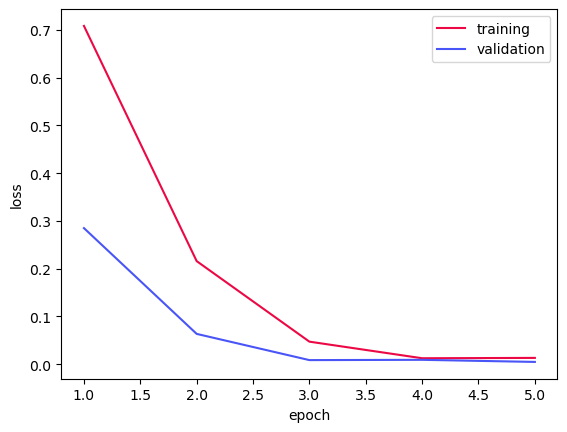

In [22]:
epoch_nums = range(1, num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss, color = "#ec0844")
plt.plot(epoch_nums, validation_loss, color = "#4955f7")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["training", "validation"], loc = "upper right")
plt.show()

## Model performansını değerlendirme

Test verilerine dayalı olarak nihai doğruluğu görebiliriz, ancak genellikle performans metriklerini biraz daha derinlemesine araştırmak isteriz. Modelin her sınıfı ne kadar iyi tahmin ettiğini görmek için bir karışıklık matrisi çizelim.

In [26]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

Doğrulama verilerinden tahminler oluşturuluyor...
1/1 [==============================] - 0s 154ms/step


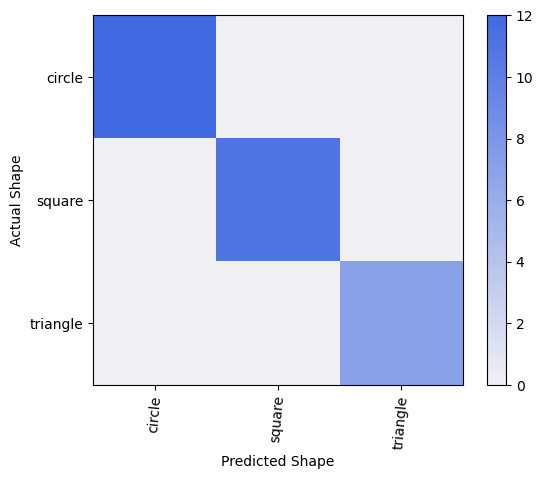

In [29]:
print("Doğrulama verilerinden tahminler oluşturuluyor...")
# Doğrulama verilerinin ilk grubu için görüntü ve etiket dizilerini alın
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]
# validation_generator doğrulama veri üreteciyi temsil eder. 
# Bu satırlarda, doğrulama veri üretecinin ilk grubundaki (batch) resim ve etiket dizilerini 
# x_test ve y_test değişkenlerine atar. Burada, sadece ilk gruptaki verilere odaklanılmıştır.

# Sınıfı tahmin etmek için modeli kullanın
class_probabilities = model.predict(x_test)

# Model, her sınıf için bir olasılık değeri döndürür
# Olasılığı en yüksek olan tahmin edilen sınıftır
predictions = np.argmax(class_probabilities, axis=1)

# Gerçek etiketler sıcak kodlanmıştır (ör. [0 1 0], bu nedenle 1 değerine sahip olanı alın
true_labels = np.argmax(y_test, axis=1)

# Karışıklık matrisini çizin
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=sns.light_palette("royalblue", as_cmap=True))
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

## Eğitimli modeli kullanma

In [30]:
from tensorflow.keras import models
from random import randint

In [36]:
# Bir görüntünün sınıfını tahmin etme işlevi
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor

    # Model, girdi olarak bir dizi görüntü bekliyor, bu nedenle 1 görüntüden oluşan bir dizi oluşturacağız
    imgfeatures = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    
    # Girdiyi eğitim verileriyle eşleşecek şekilde biçimlendirmemiz gerekiyor
    # Oluşturucu, değerleri kayan noktalı sayılar olarak yükledi
    # ve piksel değerlerini normalleştirdi, yani...
    
    imgfeatures = imgfeatures.astype("float32")
    imgfeatures /= 255
    
    # Görüntü sınıfını tahmin etmek için modeli kullanın
    class_probabilities = classifier.predict(imgfeatures)
    
    # Tahmin edilen en yüksek olasılığa sahip sınıf tahminlerini bulun
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

# Rastgele bir görüntü oluşturma işlevi (kare, daire veya üçgenden)
def create_image(size, shape):
    from PIL import Image, ImageDraw
    
    xy1 = randint(10,40)
    xy2 = randint(60,100)
    col = (randint(0,200), randint(0,200), randint(0,200))
    
    img = Image.new("RGB", size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    if shape == "circle":
        draw.ellipse([(xy1, xy1), (xy2, xy2)], fill = col)
    elif shape == "triangle":
        draw.polygon([(xy1,xy1), (xy2,xy2), (xy2,xy1)], fill=col)
    else:
        draw.rectangle([(xy1,xy1), (xy2,xy2)], fill=col)
    del draw
    
    return np.array(img)

1/1 [==============================] - 0s 58ms/step
circle


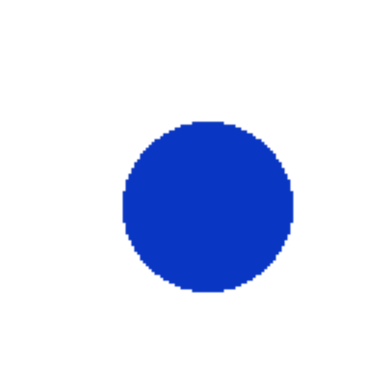

In [37]:
# Rastgele bir test görüntüsü oluşturun
classnames = os.listdir(data_folder)
classnames.sort()
img = create_image((128, 128), classnames[randint(0, len(classnames)-1)])
plt.axis("off")
plt.imshow(img)

# Sınıfı tahmin etmek için sınıflandırıcıyı kullanın
class_idx = predict_image(model, img)
print(classnames[class_idx])